# 0.0 IMPORTS

In [1]:
import inflection
import pandas  as pd
import numpy   as np
import seaborn as sns

from IPython.display import HTML
from IPython.display import Image
from matplotlib      import pyplot as plt

In [2]:
# configuração dos gráficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.1 Load Data

In [3]:
df_raw = pd.read_excel('Retained_Bank.xlsx')

In [4]:
df_raw.head()

,Date,Package Name,Store Listing Visitors,Acquisition Channel,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,B4 Bank,1628,Organic,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
1,2019-08-01 00:00:00,B4 Bank,514,Third-party referrers,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652
2,2019-08-01 00:00:00,B4 Bank,113,Other,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565
3,2019-08-02 00:00:00,B4 Bank,1610,Organic,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
4,2019-08-02 00:00:00,B4 Bank,55,Tracked channels (UTM),10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800


# 1.0 DATA DESCRIPTION

In [5]:
# create a copy
df1 = df_raw.copy()

Retained Bank	
*Date*: Data de retenção dos dados

*Package Name*:	Nome do Aplicativo

*Acquisition Channel*:	Canal do qual foi feita a aquisição do usuário

*Store Listing Visitors*:	Número de visitas ao aplicativo na loja

*Installers*:	Número de instalações do aplicativo

*Visitor-to-Installer*: conversion rate	Taxa de visitas convertidas em instalações (Installers/Store Listing Visitors)

*Installers retained for 1 day*:	Instalações Retidas por 1 dia

*Installer-to-1 day retention rate*:	Taxa de instalações retidas por 1 dia

*Installers retained for 7 days	Instalações*: Retidas por 7 dias

*Installer-to-7 day retention rate*:	Taxa de instalações retidas por 7 dias

*Installers retained for 15 days*:	Instalações Retidas por 15 dias

*Installer-to-15 day retention rate*:	Taxa de instalações retidas por 15 dias

*Installers retained for 30 days*:	Instalações Retidas por 30 dias

*Installer-to-30 day retention rate*:	Taxa de instalações retidas por 30 dias

## 1.1 Rename columns

In [6]:
df1.columns

Index(['Date', 'Package Name', 'Store Listing Visitors', 'Acquisition Channel',
       'Installers', 'Visitor-to-Installer conversion rate',
       'Installers retained for 1 day', 'Installer-to-1 day retention rate',
       'Installers retained for 7 days', 'Installer-to-7 days retention rate',
       'Installers retained for 15 days',
       'Installer-to-15 days retention rate',
       'Installers retained for 30 days',
       'Installer-to-30 days retention rate'],
      dtype='object')

In [7]:
old_columns = ['Date', 'Package Name', 'Store Listing Visitors', 'Acquisition Channel',
       'Installers', 'Visitor-to-Installer conversion rate',
       'Installers retained for 1 day', 'Installer-to-1 day retention rate',
       'Installers retained for 7 days', 'Installer-to-7 days retention rate',
       'Installers retained for 15 days',
       'Installer-to-15 days retention rate',
       'Installers retained for 30 days',
       'Installer-to-30 days retention rate']

# snakecase = lambda x: inflection.underscore( x )

# new_columns = list( map( snakecase, old_columns ) )

new_columns = ['date', 'package_name', 'store_listing_visitors', 'acquisition_channel',
       'installers', 'visitor_to_installer_conversion_rate',
       'installers_retained_for_1_day', 'installer_to_1_day_retention_rate',
       'installers_retained_for_7_days', 'installer_to_7_days_retention_rate',
       'installers_retained_for_15_days',
       'installer_to_15_days_retention_rate',
       'installers_retained_for_30_days',
       'installer_to_30_days_retention_rate']


# rename
df1.columns = new_columns
df1.columns

Index(['date', 'package_name', 'store_listing_visitors', 'acquisition_channel',
       'installers', 'visitor_to_installer_conversion_rate',
       'installers_retained_for_1_day', 'installer_to_1_day_retention_rate',
       'installers_retained_for_7_days', 'installer_to_7_days_retention_rate',
       'installers_retained_for_15_days',
       'installer_to_15_days_retention_rate',
       'installers_retained_for_30_days',
       'installer_to_30_days_retention_rate'],
      dtype='object')

## 1.2 Data Dimension

In [8]:
print( 'Number of Rows: {}'.format(df1.shape[0]) )
print( 'Number of Columns: {}'.format(df1.shape[1]) )

Number of Rows: 317
Number of Columns: 14


## 1.3 Data Types

In [9]:
df1.dtypes

date                                     object
package_name                             object
store_listing_visitors                    int64
acquisition_channel                      object
installers                                int64
visitor_to_installer_conversion_rate    float64
installers_retained_for_1_day             int64
installer_to_1_day_retention_rate       float64
installers_retained_for_7_days            int64
installer_to_7_days_retention_rate      float64
installers_retained_for_15_days           int64
installer_to_15_days_retention_rate     float64
installers_retained_for_30_days           int64
installer_to_30_days_retention_rate     float64
dtype: object

In [10]:
# change date column to date_type
df1['date'] = pd.to_datetime(df1['date'], errors="coerce" )
#df1['date'].head()

## 1.4 Check NA

In [11]:
df1.isna().sum()

date                                    4
package_name                            0
store_listing_visitors                  0
acquisition_channel                     0
installers                              0
visitor_to_installer_conversion_rate    0
installers_retained_for_1_day           0
installer_to_1_day_retention_rate       0
installers_retained_for_7_days          0
installer_to_7_days_retention_rate      0
installers_retained_for_15_days         0
installer_to_15_days_retention_rate     0
installers_retained_for_30_days         0
installer_to_30_days_retention_rate     0
dtype: int64

In [12]:
df1[df1['date'].isna()]

,date,package_name,store_listing_visitors,acquisition_channel,installers,visitor_to_installer_conversion_rate,installers_retained_for_1_day,installer_to_1_day_retention_rate,installers_retained_for_7_days,installer_to_7_days_retention_rate,installers_retained_for_15_days,installer_to_15_days_retention_rate,installers_retained_for_30_days,installer_to_30_days_retention_rate
196,NaT,B4 Bank,1874,Organic,275,0.147,249,0.905,242,0.880,234,0.851,229,0.833
197,NaT,B4 Bank,1204,Tracked channels (UTM),10,0.008,10,1000.000,9,0.900,9,0.900,9,0.900
198,NaT,B4 Bank,2000,Third-party referrers,156,0.078,121,0.776,100,0.641,91,0.583,78,0.500
199,NaT,B4 Bank,90,Other,12,0.133,11,0.917,10,0.833,10,0.833,10,0.833


In [13]:
# Drop day 31/09/2019
df1 = df1.dropna()

## 1.5 Descriptive Statistical

In [14]:
# Isolate numerical and categorical variables
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( include=['object'] )

### 1.5.1 Numerical Attributes

In [15]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min , max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concat
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['Atribbutes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Std', 'Skew', 'Kurtosis']
m

,Atribbutes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,store_listing_visitors,51.000,8292.000,8241.000,1037.996805,452.000,1234.561620,1.930437,5.046744
1,installers,3.000,875.000,872.000,144.271565,33.000,175.811400,1.132162,0.364885
2,visitor_to_installer_conversion_rate,0.007,0.314,0.307,0.143572,0.144,0.080808,-0.038385,-0.958544
3,installers_retained_for_1_day,3.000,809.000,806.000,122.054313,25.000,154.643629,1.295993,0.955773
4,installer_to_1_day_retention_rate,0.429,1000.000,999.571,122.117428,0.867,326.333679,2.329588,3.448981
5,installers_retained_for_7_days,2.000,784.000,782.000,113.929712,24.000,147.776756,1.367246,1.184281
6,installer_to_7_days_retention_rate,0.286,1000.000,999.714,61.408994,0.807,238.605025,3.697184,11.744180
7,installers_retained_for_15_days,2.000,768.000,766.000,109.814696,23.000,144.059373,1.405336,1.313472
8,installer_to_15_days_retention_rate,0.286,1000.000,999.714,48.612505,0.778,213.449445,4.253255,16.193624
9,installers_retained_for_30_days,2.000,751.000,749.000,105.392971,21.000,140.273542,1.442661,1.436261


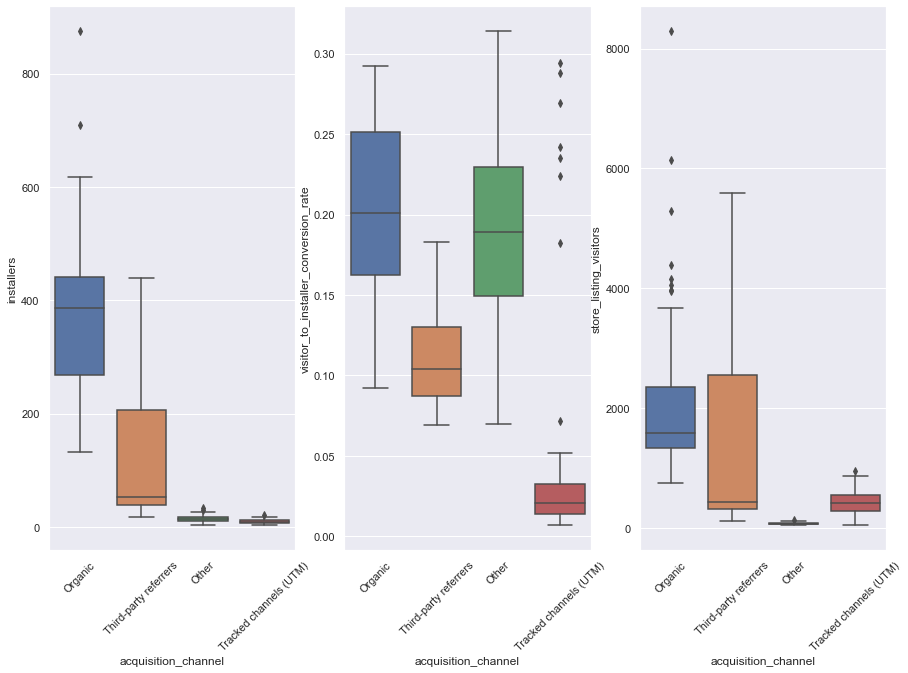

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
sns.boxplot(x='acquisition_channel', y='installers', data=df1)
plt.xticks(rotation = 45)
plt.subplot(1,3,2)
sns.boxplot(x='acquisition_channel', y='visitor_to_installer_conversion_rate', data=df1)
plt.xticks(rotation = 45)
plt.subplot(1,3,3)
sns.boxplot(x='acquisition_channel', y='store_listing_visitors', data=df1)
plt.xticks(rotation = 45)
plt.show()

# 2.0 FEATURE ENGINEERING

In [15]:
df2 = df1.copy()

In [16]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# dayofweek
df2['day_of_week'] = df2['date'].dt.dayofweek
#Day_month
#df2['date_month'] = df2['date'].dt.strftime('%Y-%m')


# oportunidade de retenção
# total nao retido
df2['not_retained'] =   df2['store_listing_visitors'] - df2['installers'] 
# diferença 1/7 dias
df2['dif_1_7_days'] = df2['installers_retained_for_1_day'] - df2['installers_retained_for_7_days']
# diferença 7/15 dias
df2['dif_7_15_days'] = df2['installers_retained_for_7_days'] - df2['installers_retained_for_15_days']
# diferença 15/30 dias
df2['dif_15_30_days'] = df2['installers_retained_for_15_days'] - df2['installers_retained_for_30_days']

In [17]:
df2.head()

,date,package_name,store_listing_visitors,acquisition_channel,installers,visitor_to_installer_conversion_rate,installers_retained_for_1_day,installer_to_1_day_retention_rate,installers_retained_for_7_days,installer_to_7_days_retention_rate,installers_retained_for_15_days,installer_to_15_days_retention_rate,installers_retained_for_30_days,installer_to_30_days_retention_rate,year,month,day,day_of_week,not_retained,dif_1_7_days,dif_7_15_days,dif_15_30_days
0,2019-08-01,B4 Bank,1628,Organic,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797,2019,8,1,3,1214,15,9,5
1,2019-08-01,B4 Bank,514,Third-party referrers,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652,2019,8,1,3,468,3,3,2
2,2019-08-01,B4 Bank,113,Other,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565,2019,8,1,3,90,0,3,1
3,2019-08-02,B4 Bank,1610,Organic,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791,2019,8,2,4,1203,16,8,8
4,2019-08-02,B4 Bank,55,Tracked channels (UTM),10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800,2019,8,2,4,45,0,1,1


# 3.0 EXPLORATORY DATA ANALYSIS

In [18]:
df3 = df2.copy()

## 3.1 Numerical Variables

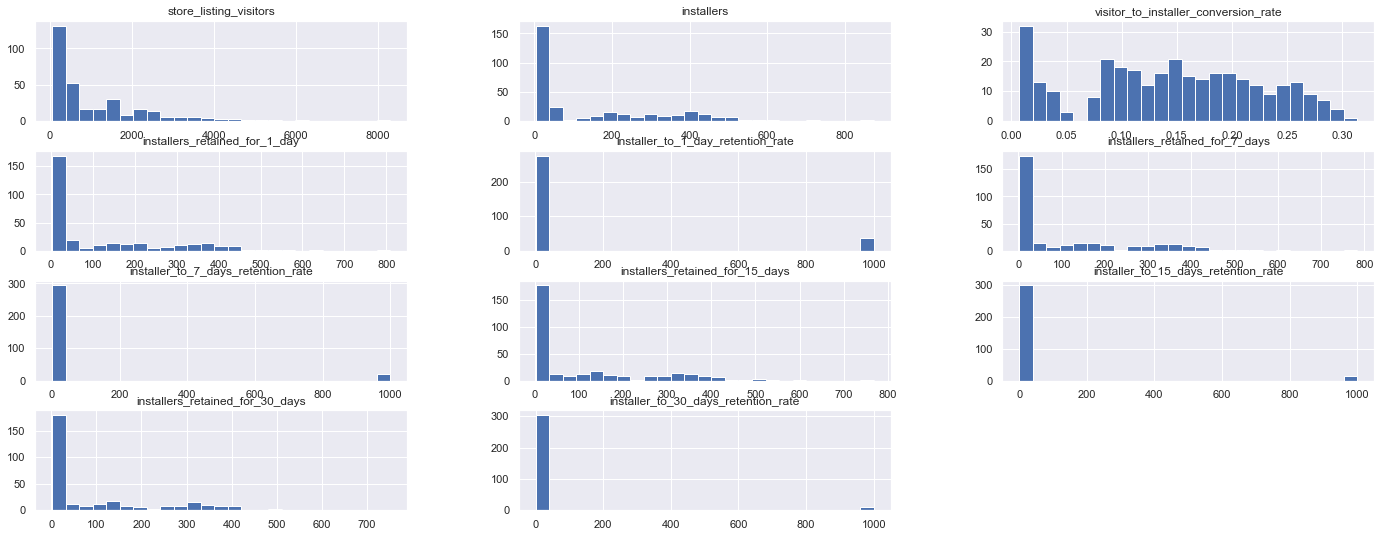

In [25]:
num_attributes.hist(bins=25);

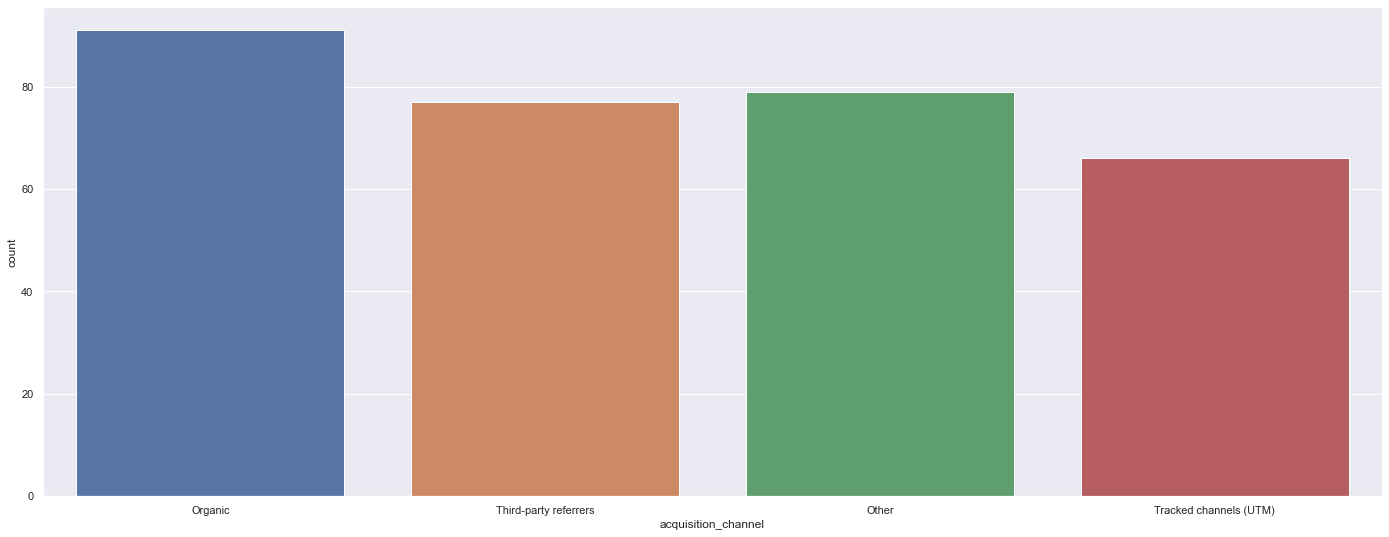

In [26]:
sns.countplot(x= 'acquisition_channel', data=df3);

## 3.2 Bivariate Analysis

LISTA DE HIPOTESES
- H1 Canal de aquisição orgânico representa a maior quantidade de visualizações na loja de aplicativos.
- H2 Canais de aquisição com maior número de visitas na loja possuem um maior número de instalações.
- H3 Canais de aquisição com mais instalações possuem um maior número de clientes retidos.
- H4 Clientes que ficaram na base por 1 dia tem mais chances de ficar por 7 dias
- H5 Clientes que ficaram na base por 7 dias tem mais chances de ficar por 15 dias
- H6 Clientes que ficaram na base por 15 dias tem mais chances de ficar por 30 dias
- H7 O Dia com mais visitas foi o dia com mais instalações
- H8 Mais instalações são realizadas aos fins de semana 

### - H1 Canal de aquisição orgânico representa a maior quantidade de visualizações na loja de aplicativos. *VERDADEIRO*

No período analisado o canal de aquisição Organic representou 33706 instalações. 

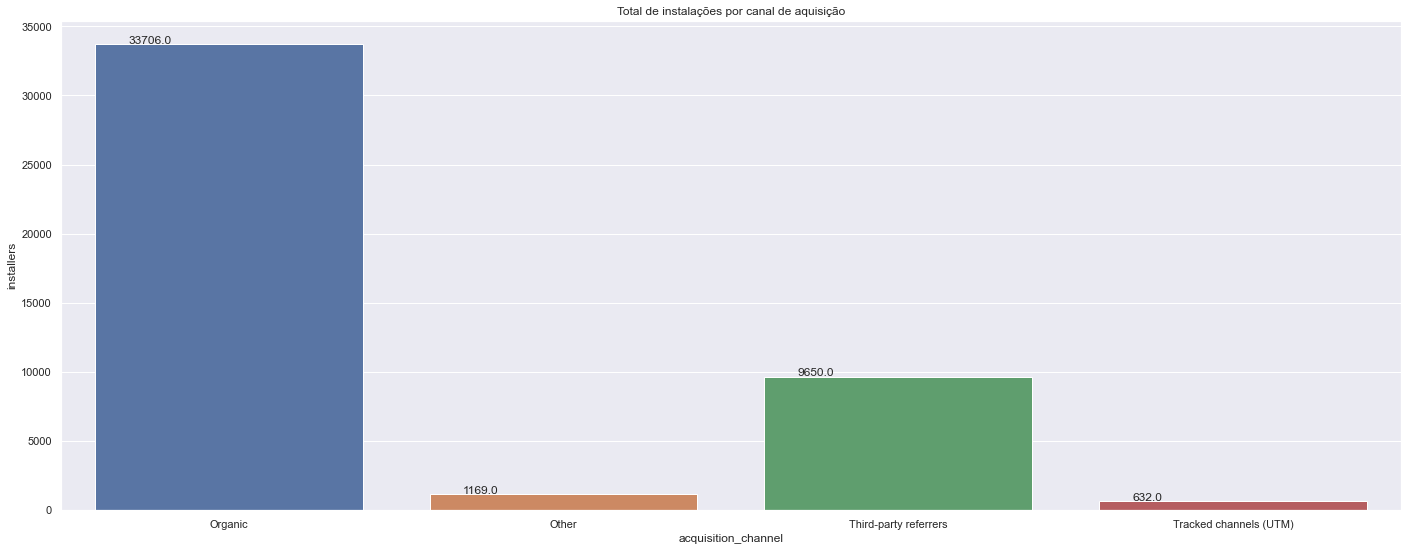

In [37]:
aux1 = df3[['acquisition_channel', 'installers']].groupby( 'acquisition_channel' ).sum().reset_index()
ax = sns.barplot( x='acquisition_channel', y='installers', data=aux1 )
plt.title( 'Total de instalações por canal de aquisição' );

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

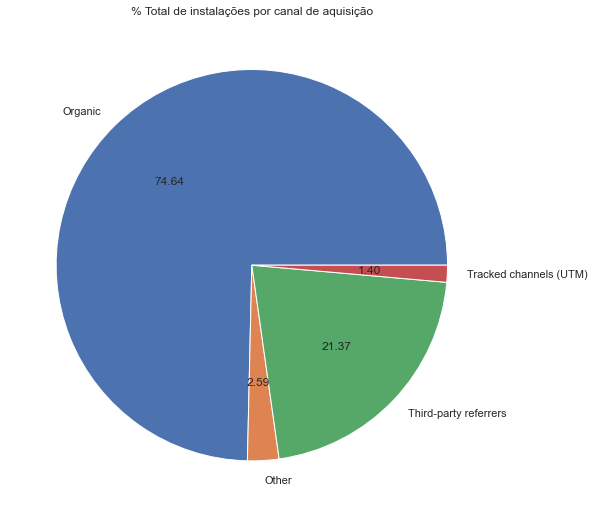

In [35]:
aux2 = df3[['acquisition_channel', 'installers']].groupby( 'acquisition_channel' ).sum().reset_index()
plt.pie( 'installers', labels='acquisition_channel', data=aux2, autopct='%.2f' )
plt.title( '% Total de instalações por canal de aquisição' );
plt.show()

### - H2 Canais de aquisição com maior número de visitas na loja possuem um maior número de instalações. *VERDADEIRO*

Os 2 canais com maior número de visitas são respectivamente os canais que tiveram um maior número de instalações após visita na loja.

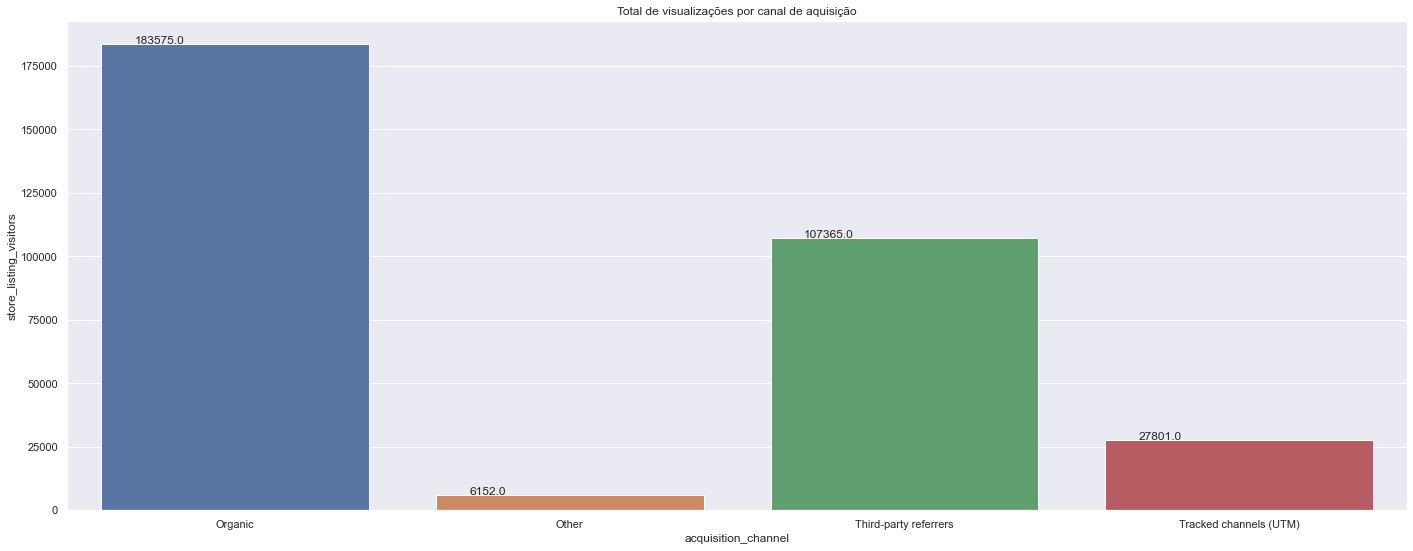

In [38]:
aux1 = df3[['acquisition_channel', 'store_listing_visitors']].groupby( 'acquisition_channel' ).sum().reset_index()
ax = sns.barplot( x='acquisition_channel', y='store_listing_visitors', data=aux1 )
plt.title( 'Total de visualizações por canal de aquisição' );

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

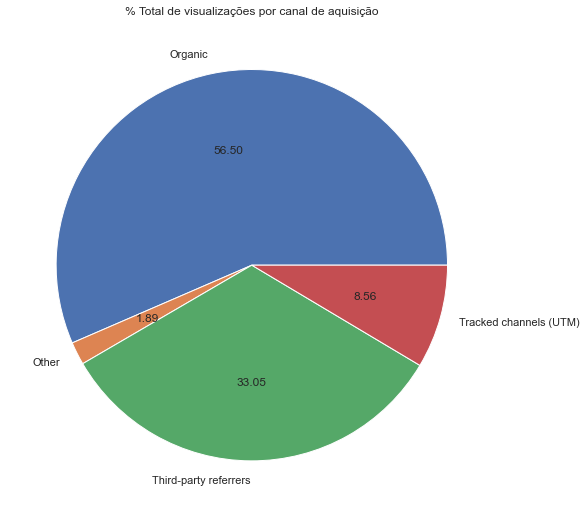

In [34]:
aux3 = df3[['acquisition_channel', 'store_listing_visitors']].groupby( 'acquisition_channel' ).sum().reset_index()
plt.pie( 'store_listing_visitors', labels='acquisition_channel', data=aux3, autopct='%.2f' )
plt.title( '% Total de visualizações por canal de aquisição' );
plt.show()

### - H3 Canais de aquisição com mais instalações possuem um maior número de clientes retidos por mais de 30 dias - *VERDADEIRO*

Os 2 canais com maior número de visitas são respectivamente os canais que mantiveram mais clientes no período de 30 dias

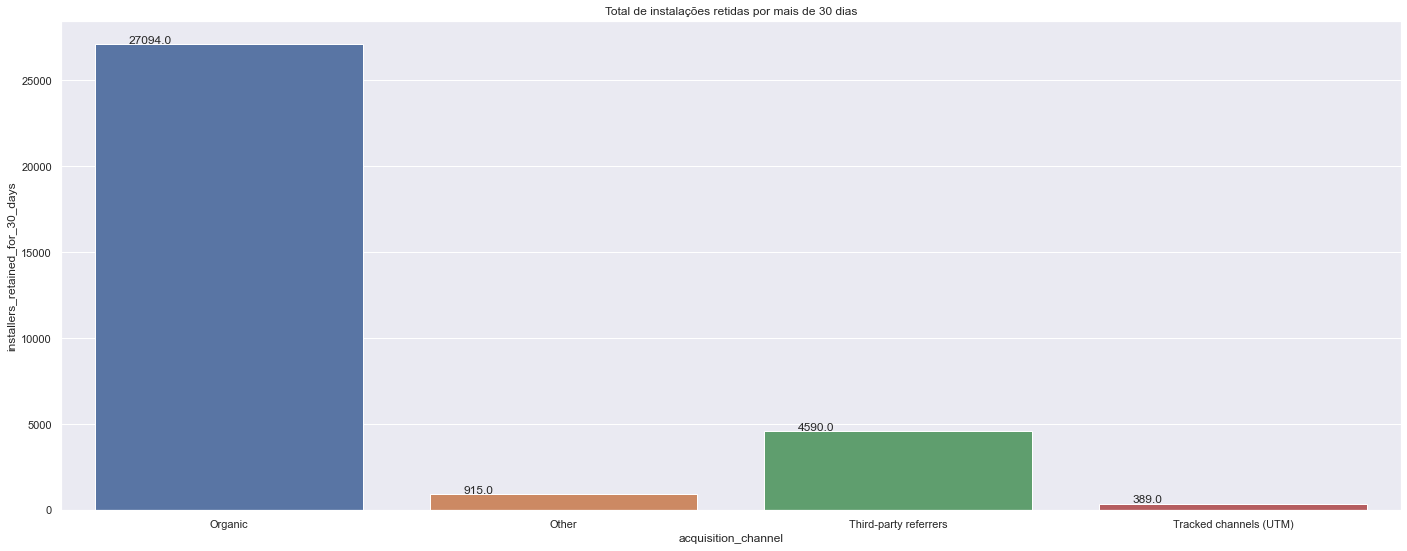

In [30]:
aux1 = df3[['acquisition_channel', 'installers_retained_for_30_days']].groupby( 'acquisition_channel' ).sum().reset_index()
ax = sns.barplot( x='acquisition_channel', y='installers_retained_for_30_days', data=aux1 )
plt.title( 'Total de instalações retidas por mais de 30 dias' );
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### - H4 Clientes que ficaram na base por 1 dia tem mais chances de ficar por 7 dias 

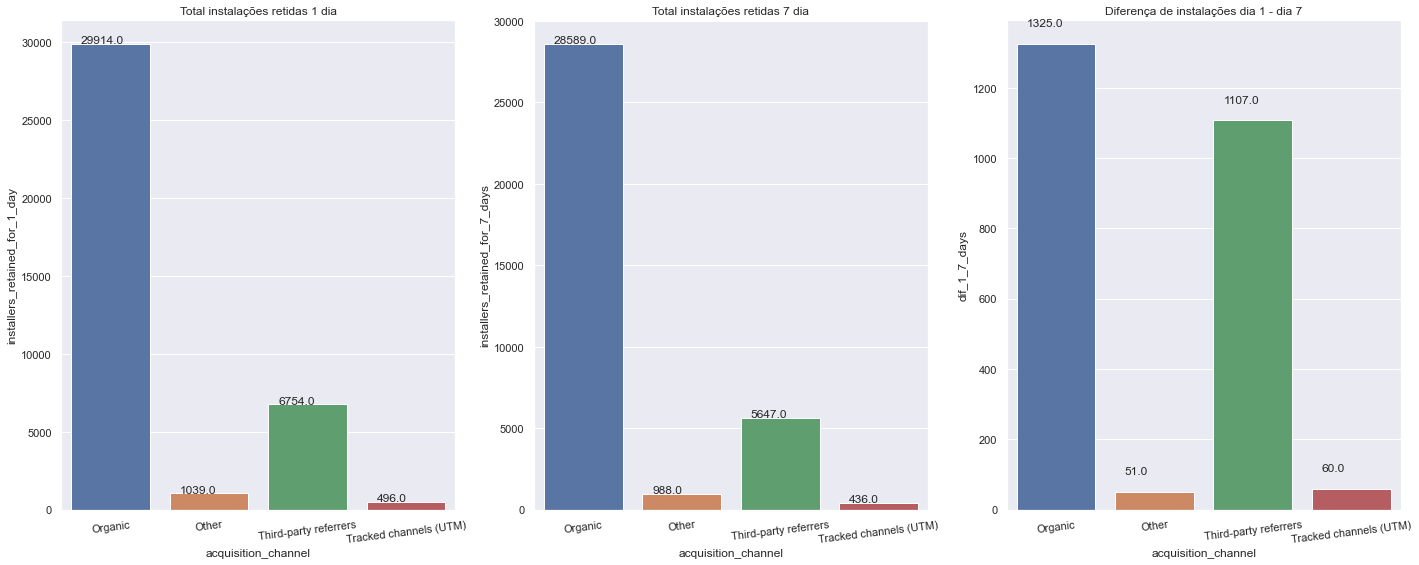

In [30]:
# plot 1 total instalações retidas 1 dia
aux1 = df3[['acquisition_channel', 'installers_retained_for_1_day']].groupby('acquisition_channel').sum().reset_index()

plt.subplot(1, 3, 1)
plt.title( 'Total instalações retidas 1 dia' );
plt.xticks(rotation = 7)

ax = sns.barplot(x='acquisition_channel', y='installers_retained_for_1_day', data=aux1)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

aux2 = df3[['acquisition_channel', 'installers_retained_for_7_days']].groupby('acquisition_channel').sum().reset_index()

# plot 2 total instalações retidas 7 dias
plt.subplot(1, 3, 2)
plt.title( 'Total instalações retidas 7 dia' );
plt.xticks(rotation = 7)
ax2 = sns.barplot(x='acquisition_channel', y='installers_retained_for_7_days', data=aux2)
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))     

# plot 3 detalhe diferença 1/7 dias
aux3 = df3[['acquisition_channel', 'dif_1_7_days']].groupby('acquisition_channel').sum().reset_index()

plt.subplot(1, 3, 3)
plt.title( 'Diferença de instalações dia 1 - dia 7' );
plt.xticks(rotation = 7)
ax3 = sns.barplot(x='acquisition_channel', y='dif_1_7_days', data=aux3)
for p in ax3.patches:
        ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### - H5 Clientes que ficaram na base por 7 dias tem mais chances de ficar por 15 dias

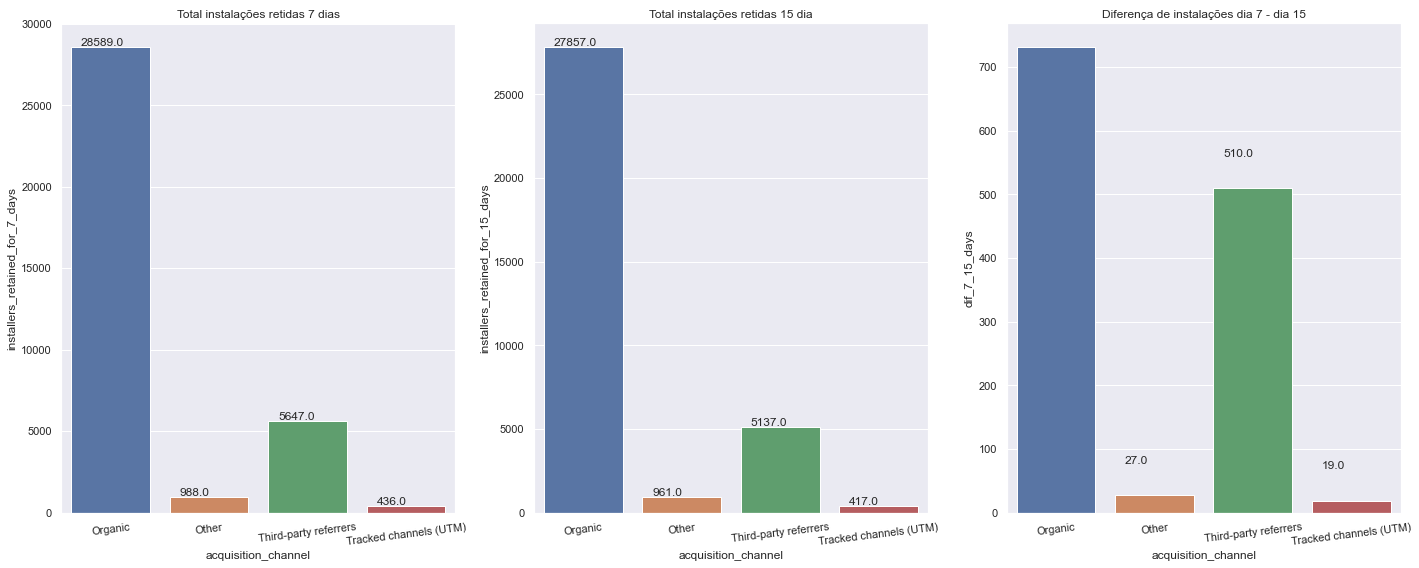

In [31]:
# plot 1 total instalações retidas 7 dias
aux1 = df3[['acquisition_channel', 'installers_retained_for_7_days']].groupby('acquisition_channel').sum().reset_index()

plt.subplot(1, 3, 1)
plt.title( 'Total instalações retidas 7 dias' );
plt.xticks(rotation = 7)
ax = sns.barplot(x='acquisition_channel', y='installers_retained_for_7_days', data=aux1)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


aux2 = df3[['acquisition_channel', 'installers_retained_for_15_days']].groupby('acquisition_channel').sum().reset_index()

# plot 2 total instalações retidas 7 dias
plt.subplot(1, 3, 2)
plt.title( 'Total instalações retidas 15 dia' );
plt.xticks(rotation = 7)
ax2 = sns.barplot(x='acquisition_channel', y='installers_retained_for_15_days', data=aux2)
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))     
        
        
        
# plot 3 detalhe diferença 1/7 dias
aux3 = df3[['acquisition_channel', 'dif_7_15_days']].groupby('acquisition_channel').sum().reset_index()

plt.subplot(1, 3, 3)
plt.title( 'Diferença de instalações dia 7 - dia 15' );
plt.xticks(rotation = 7)
ax3 = sns.barplot(x='acquisition_channel', y='dif_7_15_days', data=aux3)
for p in ax3.patches:
        ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### - H6 Clientes que ficaram na base por 15 dias tem mais chances de ficar por 30 dias

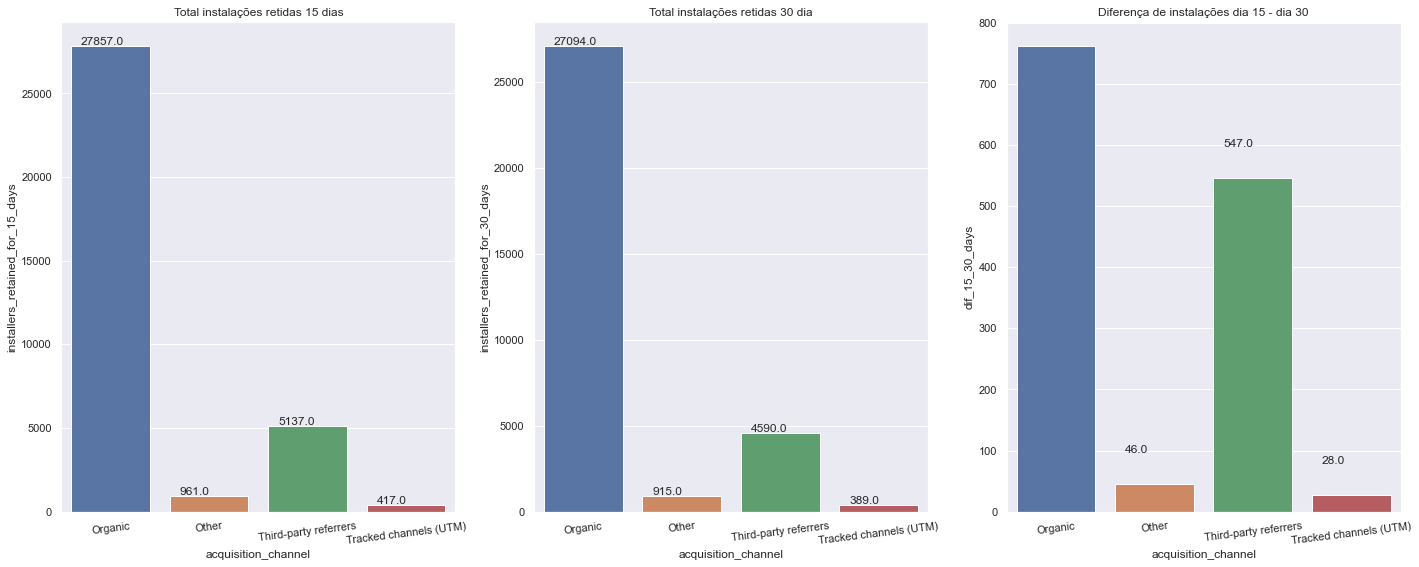

In [32]:
# plot 1 total instalações retidas 15 dias
aux1 = df3[['acquisition_channel', 'installers_retained_for_15_days']].groupby('acquisition_channel').sum().reset_index()

plt.subplot(1, 3, 1)
plt.title( 'Total instalações retidas 15 dias' );
plt.xticks(rotation = 7)
ax = sns.barplot(x='acquisition_channel', y='installers_retained_for_15_days', data=aux1)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

        
# plot 2 total instalações retidas 30 dias
aux2 = df3[['acquisition_channel', 'installers_retained_for_30_days']].groupby('acquisition_channel').sum().reset_index()


plt.subplot(1, 3, 2)
plt.title( 'Total instalações retidas 30 dia' );
plt.xticks(rotation = 7)
ax2 = sns.barplot(x='acquisition_channel', y='installers_retained_for_30_days', data=aux2)
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))     
        
        
        
# plot 3 detalhe diferença 1/7 dias
aux3 = df3[['acquisition_channel', 'dif_15_30_days']].groupby('acquisition_channel').sum().reset_index()

plt.subplot(1, 3, 3)
plt.title( 'Diferença de instalações dia 15 - dia 30' );
plt.xticks(rotation = 7)
ax3 = sns.barplot(x='acquisition_channel', y='dif_15_30_days', data=aux3)
for p in ax3.patches:
         ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [151]:
# only organic data
aux_organic = df3[df3['acquisition_channel'] == 'Organic']
# only Third-party data
aux_thirdparty = df3[df3['acquisition_channel'] == 'Third-party referrers']
# Only Other data
aux_other = df3[df3['acquisition_channel'] == 'Other']
# Only UTM data
aux_utm = df3[df3['acquisition_channel'] == 'Tracked channels (UTM)']

In [111]:
# Organic
print('O dia que o canal Organic teve mais download foi: 2019-09-27 com um total de: {0} instalações'.format(aux_organic['installers'].max()))
# Third-party referrers
print('\nO dia que o canal Third-party referrers teve mais download foi: 2019-10-06 com um total de: {0} instalações'.format(aux_thirdparty['installers'].max()))
# other
print('\nO dia que o canal Other teve mais download foi: 2019-08-05 com um total de: {0} instalações'.format(aux_other['installers'].max()))
# utm
print('\nO dia que o canal Tracked channels (UTM) teve mais download foi: 2019-10-13 com um total de: {0} instalações'.format(aux_utm['installers'].max()))

O dia que o canal Organic teve mais download foi: 2019-09-27 com um total de: 875 instalações

O dia que o canal Third-party referrers teve mais download foi: 2019-10-06 com um total de: 439 instalações

O dia que o canal Other teve mais download foi: 2019-08-05 com um total de: 33 instalações

O dia que o canal Tracked channels (UTM) teve mais download foi: 2019-10-13 com um total de: 21 instalações


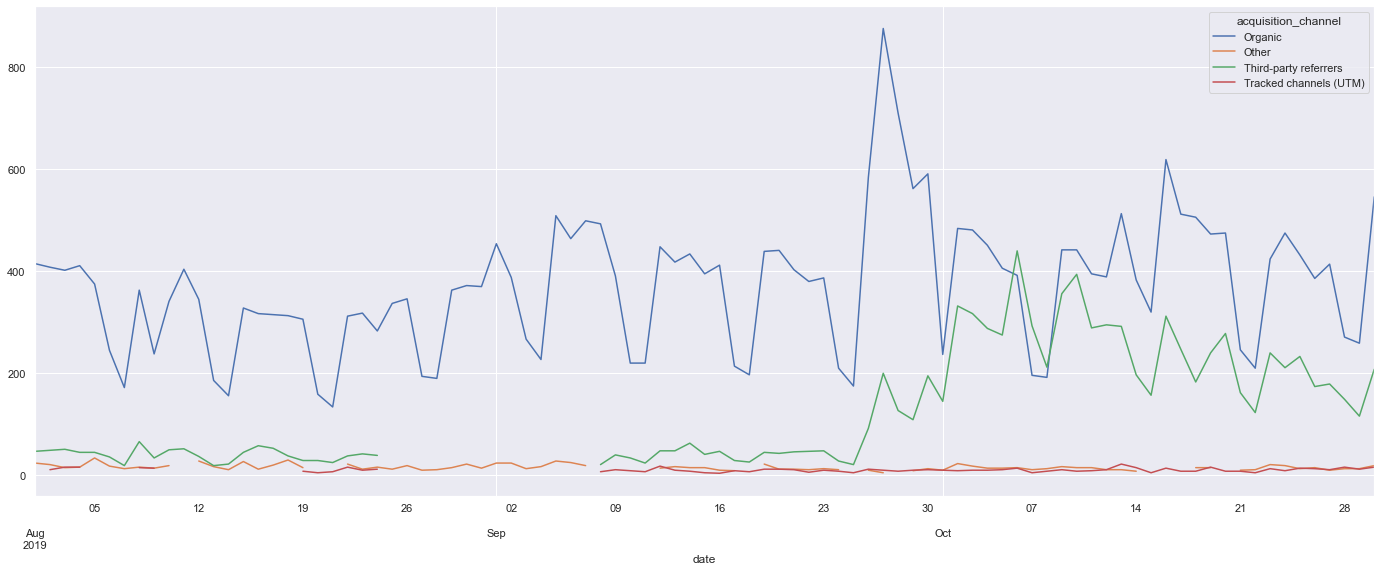

In [168]:
aux1 = df3[[ 'date','acquisition_channel', 'installers']].groupby(['date','acquisition_channel']).sum().reset_index()
aux1.pivot(index='date', columns='acquisition_channel', values='installers').plot();

### H8 Mais instalações são realizadas aos fins de semana 

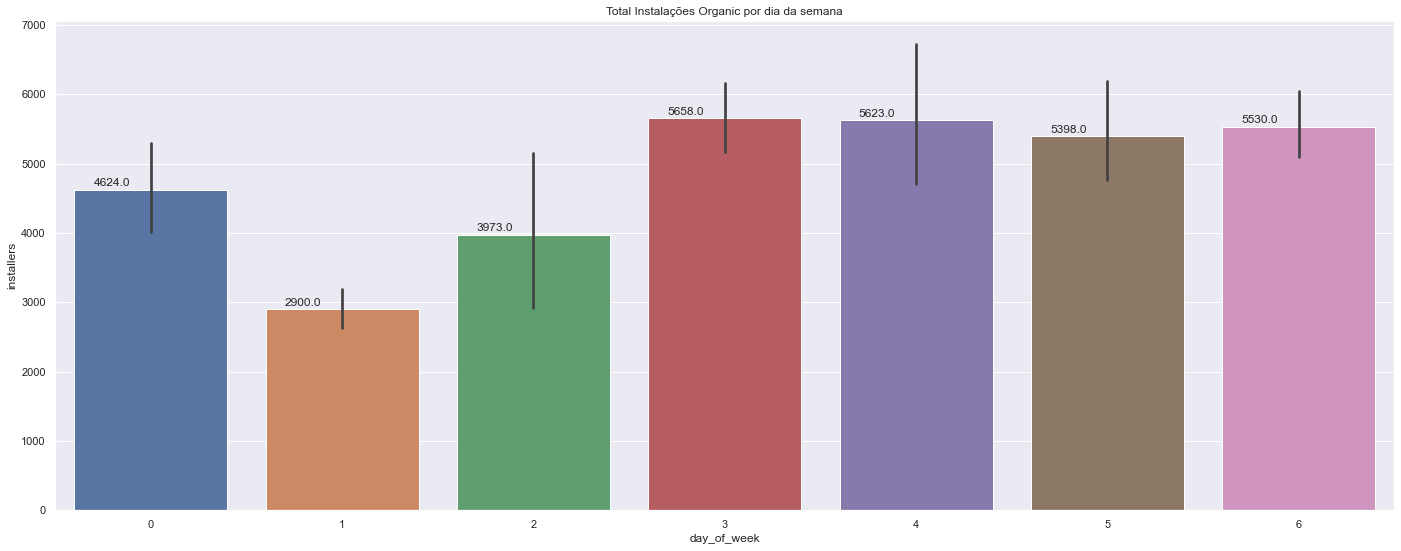

In [155]:
ax = sns.barplot(x = 'day_of_week', y='installers', data=aux_organic, estimator=sum )
plt.title('Total Instalações Organic por dia da semana')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

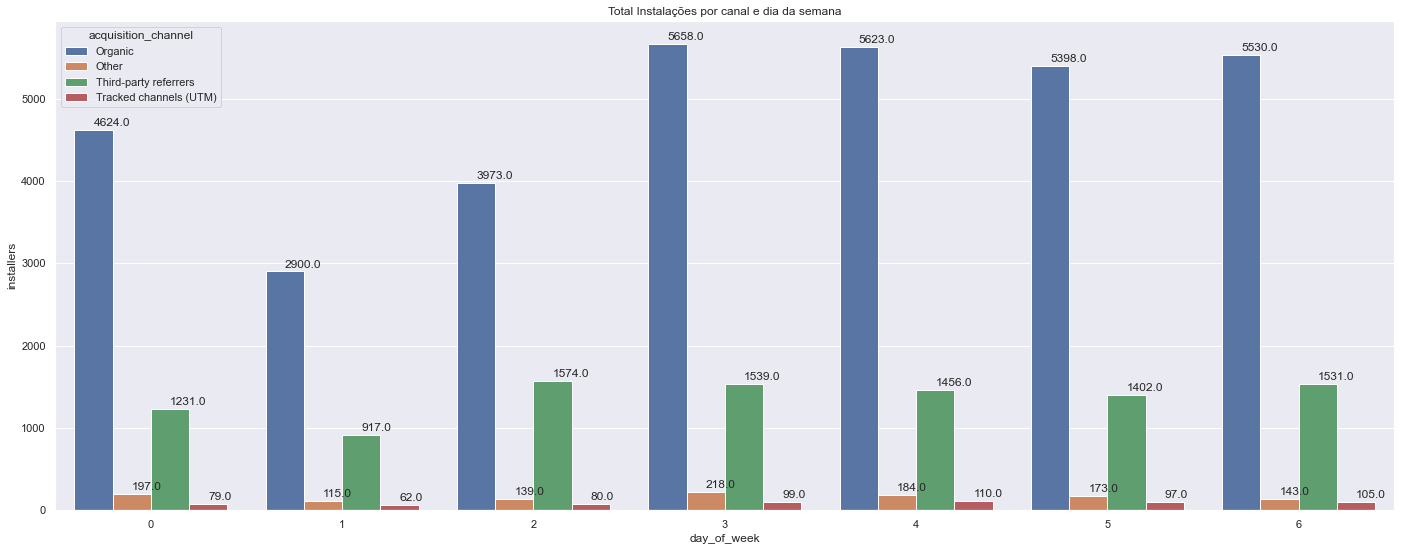

In [154]:
aux1 = df3[[ 'day_of_week','acquisition_channel', 'installers']].groupby(['day_of_week','acquisition_channel']).sum().reset_index()
ax = sns.barplot(x = 'day_of_week', y='installers',hue="acquisition_channel", data=aux1 )
plt.title('Total Instalações por canal e dia da semana')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [142]:
aux1 = df3[[ 'day_of_week','acquisition_channel', 'installers']].groupby(['day_of_week','acquisition_channel']).sum().reset_index()

#aux3 = df3['date_month', 'installers','acquisition_channel' ].groupby( 'date_month', 'acquisition_channel').sum().reset_index()

### H7 - O Dia com mais visitas foi o dia com mais instalações - *Inconclusivo*

Nos casos dos canais Organic e Third-party a hipótese é verdadeira, Other e Tracked channels (UTM) a hipótese é falsa.

In [156]:
# Organic
print('O dia que o canal Organic teve mais visitas na loja foi: 2019-09-27 com um total de: {0} visitas'.format(aux_organic['store_listing_visitors'].max()))
# Third-party referrers
print('\nO dia que o canal Third-party referrers teve mais visitas na loja foi: 2019-10-06 com um total de: {0} visitas'.format(aux_thirdparty['store_listing_visitors'].max()))
# other
print('\nO dia que o canal Other teve mais visitas na loja foi: 2019-10-02 com um total de: {0} visitas'.format(aux_other['store_listing_visitors'].max()))
# utm
print('\nO dia que o canal Tracked channels (UTM) teve mais visitas na loja foi: 2019-10-14 com um total de: {0} visitas'.format(aux_utm['store_listing_visitors'].max()))

O dia que o canal Organic teve mais visitas na loja foi: 2019-09-27 com um total de: 8292 visitas

O dia que o canal Third-party referrers teve mais visitas na loja foi: 2019-10-06 com um total de: 5591 instalações

O dia que o canal Other teve mais visitas na loja foi: 2019-08-05 com um total de: 144 instalações

O dia que o canal Tracked channels (UTM) teve mais visitas na loja foi: 2019-10-13 com um total de: 960 instalações


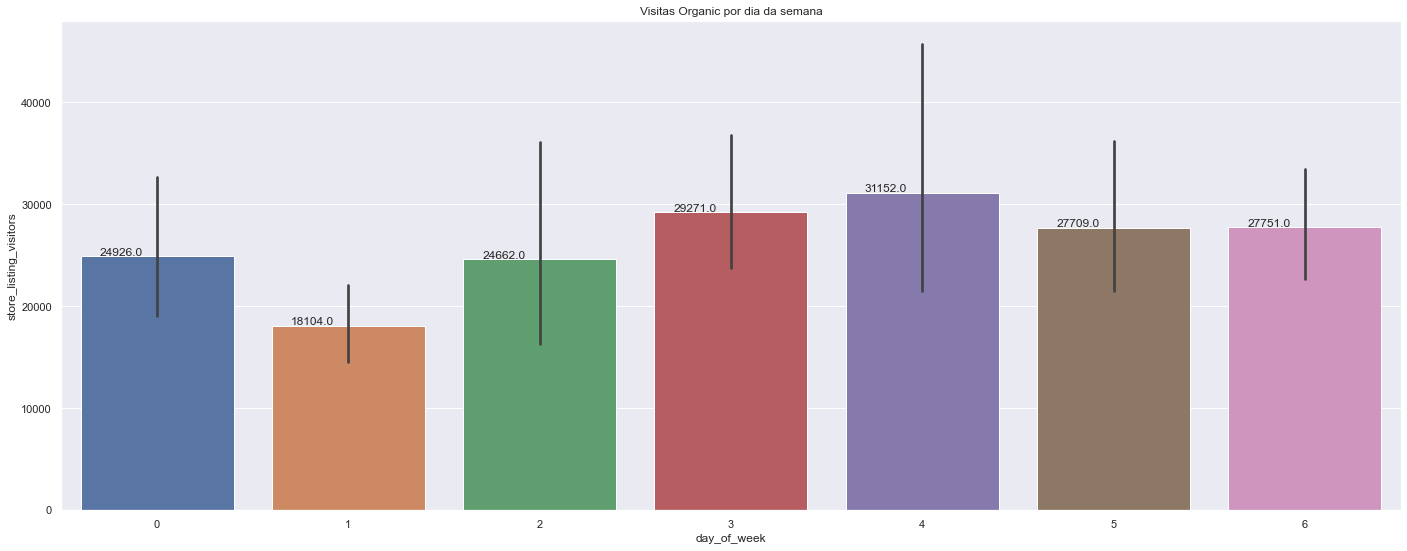

In [163]:
ax = sns.barplot(x = 'day_of_week', y='store_listing_visitors', data=aux_organic, estimator=sum )
plt.title('Visitas Organic por dia da semana')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

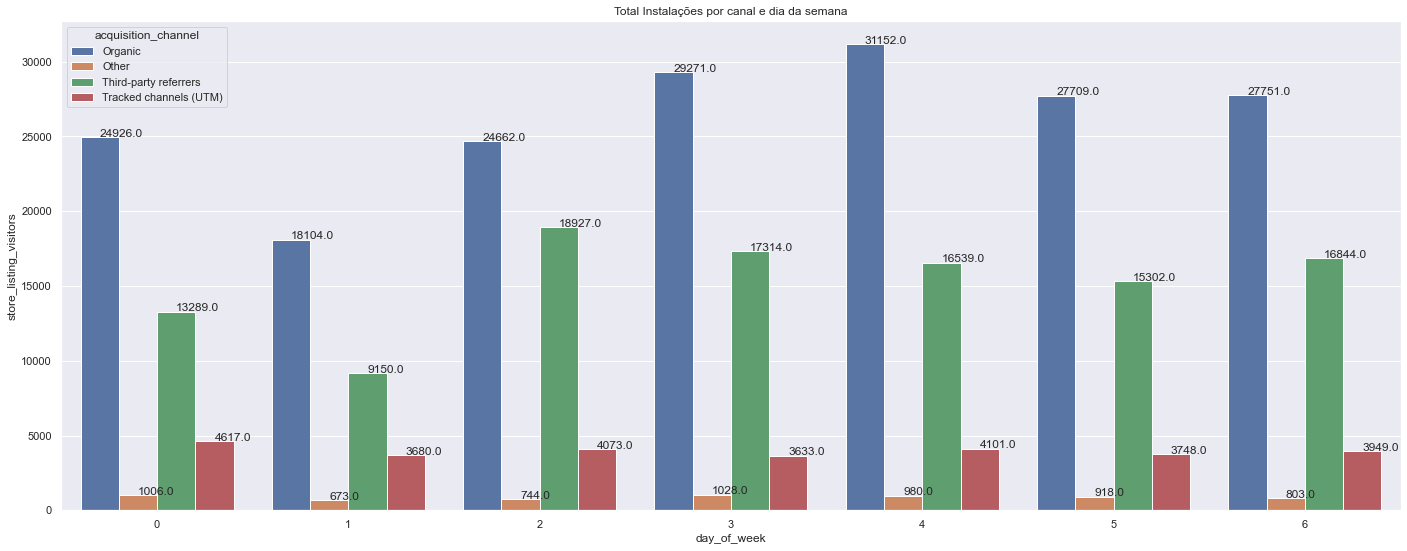

In [166]:
aux1 = df3[[ 'day_of_week','acquisition_channel', 'store_listing_visitors']].groupby(['day_of_week','acquisition_channel']).sum().reset_index()
ax = sns.barplot(x = 'day_of_week', y='store_listing_visitors',hue="acquisition_channel", data=aux1 )
plt.title('Total Instalações por canal e dia da semana')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

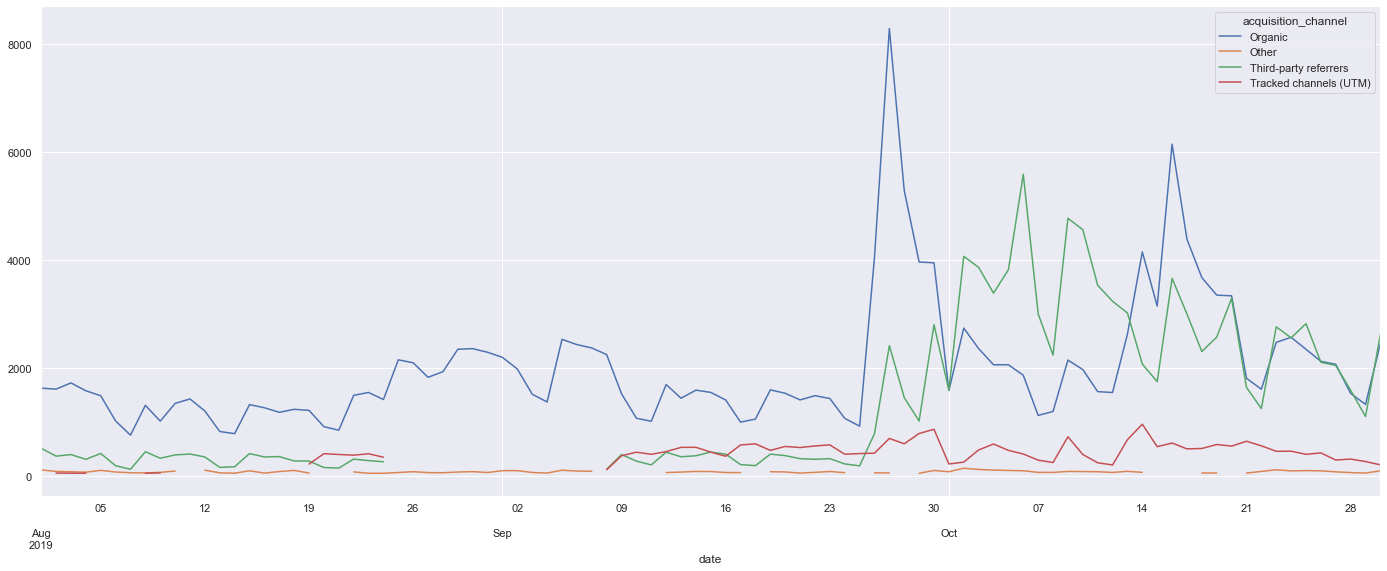

In [169]:
aux2 = df3[[ 'date','acquisition_channel', 'store_listing_visitors']].groupby(['date','store_listing_visitors']).sum().reset_index()
aux2.pivot(index='date', columns='acquisition_channel', values='store_listing_visitors').plot();

In [19]:
df3.head()

,date,package_name,store_listing_visitors,acquisition_channel,installers,visitor_to_installer_conversion_rate,installers_retained_for_1_day,installer_to_1_day_retention_rate,installers_retained_for_7_days,installer_to_7_days_retention_rate,installers_retained_for_15_days,installer_to_15_days_retention_rate,installers_retained_for_30_days,installer_to_30_days_retention_rate,year,month,day,day_of_week,not_retained,dif_1_7_days,dif_7_15_days,dif_15_30_days
0,2019-08-01,B4 Bank,1628,Organic,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797,2019,8,1,3,1214,15,9,5
1,2019-08-01,B4 Bank,514,Third-party referrers,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652,2019,8,1,3,468,3,3,2
2,2019-08-01,B4 Bank,113,Other,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565,2019,8,1,3,90,0,3,1
3,2019-08-02,B4 Bank,1610,Organic,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791,2019,8,2,4,1203,16,8,8
4,2019-08-02,B4 Bank,55,Tracked channels (UTM),10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800,2019,8,2,4,45,0,1,1


### % Total Taxa de Conversão

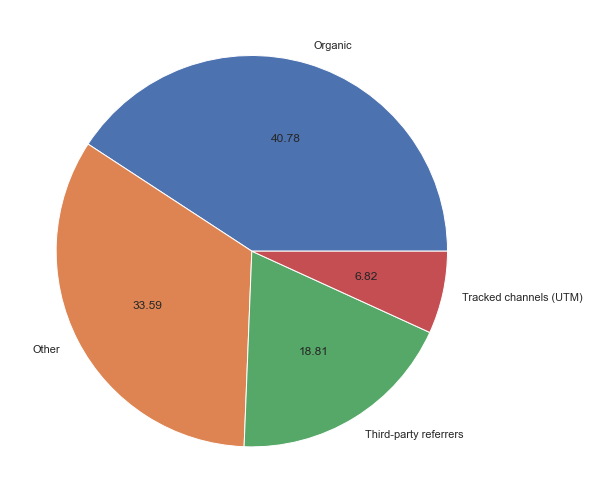

In [29]:
aux2 = df3[['acquisition_channel', 'visitor_to_installer_conversion_rate']].groupby( 'acquisition_channel' ).sum().reset_index()
plt.pie( 'visitor_to_installer_conversion_rate', labels='acquisition_channel', data=aux2, autopct='%.2f' )
plt.show()